Observable trends:


Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import requests
import random
import scipy.stats as st

# API keys
from config import weather_key


COLLECTING THE DATA

In [2]:
city_list = []
for i in range(5): #1600 gives ~600. 1000 per day limit though
    random_latitude = round(random.uniform(-90, 90), 6)
    random_longitude = round(random.uniform(-180, 180), 6)
    city = citipy.nearest_city(random_latitude, random_longitude).city_name #try without country code
    if city not in city_list:
        city_list.append(city)
print(len(city_list))

5


In [3]:
# Making the API request based on the unique city list
retrieved_data = []
num = 1

for city in city_list:
# Components for the url
    url = "https://api.openweathermap.org/data/2.5/weather?"
    api_key = weather_key
    # Replace any spaces from the city names so the url functions
    city_format = city.replace(" ", "%20")
    query_url = f"{url}q={city_format}&appid={api_key}&units=Metric"

    print(f"City no {num}: = {city}. Saving city data.")

    weather_response = requests.get(query_url)
    weather_json = weather_response.json()

    # Check to see if each city is not found. Otherwise saving the relevant data for that city 
    if weather_json['cod'] == '404':
        print("Error. Unable to locate that city.")
    else: 
        city_name = weather_json['name']
        lat = weather_json['coord']['lat']
        lng = weather_json['coord']['lon']
        max_temp = weather_json['main']['temp']
        hum = weather_json['main']['humidity']
        clds = weather_json['clouds']['all']
        wind_speed = weather_json['wind']['speed']
        country = weather_json['sys']['country']
        date = weather_json['dt']

        retrieved_data.append({"City":city_name, "Lat":lat, "Lng":lng, "Max Temp": max_temp, "Humidity": hum, "Cloudiness": clds, "Wind Speed":wind_speed, "Country": country, "Date": date})
        
        num += 1

City no 1: = hithadhoo. Saving city data.
City no 2: = shelburne. Saving city data.
City no 3: = noumea. Saving city data.
City no 4: = grand river south east. Saving city data.
Error. Unable to locate that city.
City no 4: = koudougou. Saving city data.


In [4]:
weather_info = pd.DataFrame(retrieved_data)
print(len(weather_info))
weather_info

4


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.6000,73.0833,27.70,71,100,0.78,MV,1655600008
1,Shelburne,44.0787,-80.2041,13.15,49,0,6.12,CA,1655600009
2,Noumea,-22.2763,166.4572,23.33,99,100,1.35,NC,1655600011
3,Koudougou,12.2500,-2.3667,26.13,66,100,2.41,BF,1655600013


In [5]:
# Displaying Summary statistics
weather_info.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,4.000000,4.000000,4.000000,4.000000,4.0,4.000000,4.000000e+00
mean,8.363100,39.242425,22.577500,71.250000,75.0,2.665000,1.655600e+09
std,27.747805,105.400183,6.539732,20.758532,50.0,2.400312,2.217356e+00
min,-22.276300,-80.204100,13.150000,49.000000,0.0,0.780000,1.655600e+09
25%,-6.019075,-21.826050,20.785000,61.750000,75.0,1.207500,1.655600e+09
50%,5.825000,35.358300,24.730000,68.500000,100.0,1.880000,1.655600e+09
75%,20.207175,96.426775,26.522500,78.000000,100.0,3.337500,1.655600e+09
max,44.078700,166.457200,27.700000,99.000000,100.0,6.120000,1.655600e+09


In [6]:
#  Inspect the data and remove the cities where the humidity > 100%.

In [7]:
weather_info.to_csv("output_data\weather_data.csv", encoding='utf-8', index=False) 

In [9]:
weather_info

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.6000,73.0833,27.70,71,100,0.78,MV,1655600008
1,Shelburne,44.0787,-80.2041,13.15,49,0,6.12,CA,1655600009
2,Noumea,-22.2763,166.4572,23.33,99,100,1.35,NC,1655600011
3,Koudougou,12.2500,-2.3667,26.13,66,100,2.41,BF,1655600013


PLOTTING THE DATA

Latitude Vs Max Temperature (C) Plot

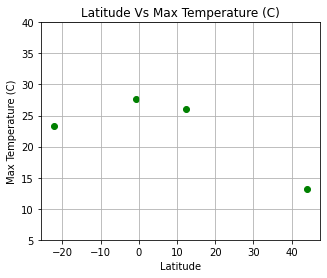

In [10]:
plt.figure(figsize=(5,4))
plt.scatter(weather_info["Lat"], weather_info["Max Temp"], color='g')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Latitude Vs Max Temperature (C)')
plt.savefig("output_data\LatVsTemp.png")
plt.ylim(5,40)
plt.grid()
plt.show()

Latitude Vs Humidity (%) Plot

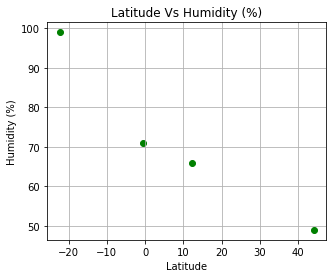

In [11]:
plt.figure(figsize=(5,4))
plt.scatter(weather_info["Lat"], weather_info["Humidity"], color='g')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude Vs Humidity (%)')
plt.savefig("output_data\LatVsHum.png")
plt.grid()
plt.show()


Latitude Vs Cloudiness (%) Plot

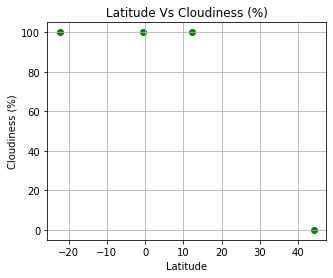

In [12]:
plt.figure(figsize=(5,4))
plt.scatter(weather_info["Lat"], weather_info["Cloudiness"], color='g')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude Vs Cloudiness (%)')
plt.savefig("output_data\LatVsCld.png")
plt.grid()
plt.show()

Latitude Vs Wind Speed (mph) Plot

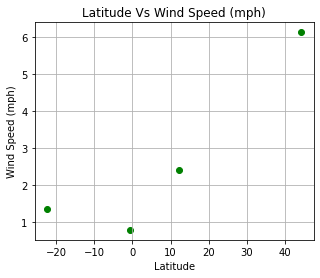

In [13]:
plt.figure(figsize=(5,4))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude Vs Wind Speed (mph)')
plt.grid()
plt.scatter(weather_info["Lat"], weather_info["Wind Speed"], color='g')
plt.savefig("output_data\LatVsWindSpeed.png")
plt.show()

In [14]:
# Sorting the weather information into Northern and Southern Hemisphere sets

N_hemi = weather_info.loc[weather_info["Lat"] > 0]
S_hemi = weather_info.loc[weather_info["Lat"] <= 0]


LINEAR REGRESSION

Northern Hemisphere - Latitude Vs Max Temp (C) Linear Regression

The r-value is: -1.0


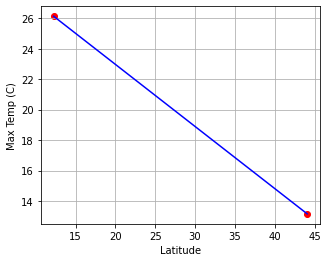

In [16]:
plt.figure(figsize=(5,4))
plt.scatter(N_hemi["Lat"], N_hemi["Max Temp"], color='r')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.savefig("output_data\NLatVsMaxTemp.png")
plt.grid()
# Isolating relevant data columns then calculating regression and coeffecient values
l = N_hemi.iloc[:, 1]
t = N_hemi.iloc[:, 3]
corr_coef = st.pearsonr(l, t)
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(l, t)
vc_fit = vc_slope * l + vc_int
plt.plot(l,vc_fit,"-", color='b')
print(f"The r-value is: {corr_coef[0]}")
plt.show()

Southern Hemisphere - Latitude Vs Max Temp (C) Linear Regression

The r-value is: 1.0


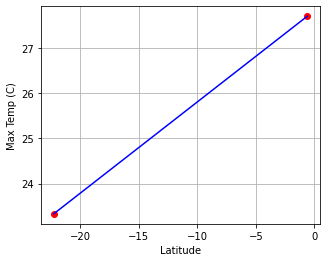

In [17]:
plt.figure(figsize=(5,4))
plt.scatter(S_hemi["Lat"], S_hemi["Max Temp"], color='r')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.savefig("output_data\SLatVsMaxTemp.png")
plt.grid()
# Isolating relevant data columns then calculating regression and coeffecient values
l = S_hemi.iloc[:, 1]
t = S_hemi.iloc[:, 3]
corr_coef = st.pearsonr(l, t)
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(l, t)
vc_fit = vc_slope * l + vc_int
plt.plot(l,vc_fit,"-", color='b')
print(f"The r-value is: {corr_coef[0]}")
plt.show()

Northern Hemisphere - Latitude Vs Humidity (%) Linear Regression

The r-value is: -1.0


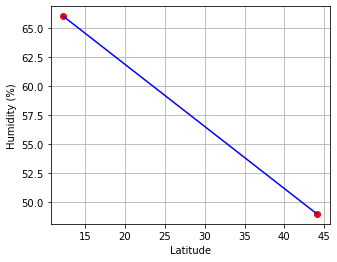

In [18]:
plt.figure(figsize=(5,4))
plt.scatter(N_hemi["Lat"], N_hemi["Humidity"], color='r')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("output_data\NLatVsHum.png")
plt.grid()
# Isolating relevant data columns then calculating regression and coeffecient values
l = N_hemi.iloc[:, 1]
t = N_hemi.iloc[:, 4]
corr_coef = st.pearsonr(l, t)
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(l, t)
vc_fit = vc_slope * l + vc_int
plt.plot(l,vc_fit,"-", color='b')
print(f"The r-value is: {corr_coef[0]}")
plt.show()

Southern Hemisphere - Latitude Vs Humidity (%) Linear Regression 

The r-value is: -1.0


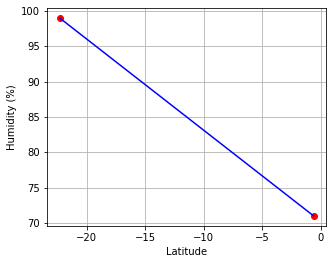

In [19]:
plt.figure(figsize=(5,4))
plt.scatter(S_hemi["Lat"], S_hemi["Humidity"], color='r')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("output_data\SLatVsHum.png")
plt.grid()
# Isolating relevant data columns then calculating regression and coeffecient values
l = S_hemi.iloc[:, 1]
t = S_hemi.iloc[:, 4]
corr_coef = st.pearsonr(l, t)
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(l, t)
vc_fit = vc_slope * l + vc_int
plt.plot(l,vc_fit,"-", color='b')
print(f"The r-value is: {corr_coef[0]}")
plt.show()

Northern Hemisphere - Latitude Vs Cloudiness (%) Linear Regression

The r-value is: -1.0


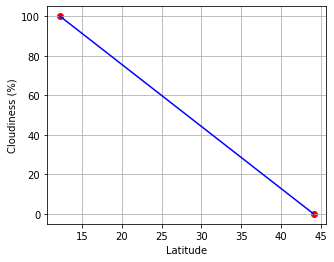

In [20]:
plt.figure(figsize=(5,4))
plt.scatter(N_hemi["Lat"], N_hemi["Cloudiness"], color='r')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("output_data\NLatVsCld.png")
plt.grid()
# Isolating relevant data columns then calculating regression and coeffecient values
l = N_hemi.iloc[:, 1]
t = N_hemi.iloc[:, 5]
corr_coef = st.pearsonr(l, t)
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(l, t)
vc_fit = vc_slope * l + vc_int
plt.plot(l,vc_fit,"-", color='b')
print(f"The r-value is: {corr_coef[0]}")
plt.show()

 Southern Hemisphere - Latitude Vs Cloudiness (%) Linear Regression

The r-value is: nan


c:\Users\king3\.conda\envs\bootcamp\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


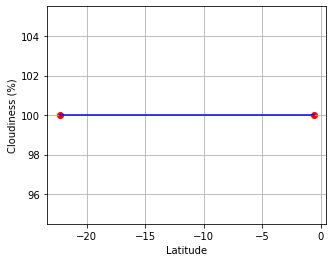

In [21]:
plt.figure(figsize=(5,4))
plt.scatter(S_hemi["Lat"], S_hemi["Cloudiness"], color='r')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("output_data\SLatVsCld.png")
plt.grid()
# Isolating relevant data columns then calculating regression and coeffecient values
l = S_hemi.iloc[:, 1]
t = S_hemi.iloc[:, 5]
corr_coef = st.pearsonr(l, t)
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(l, t)
vc_fit = vc_slope * l + vc_int
plt.plot(l,vc_fit,"-", color='b')
print(f"The r-value is: {corr_coef[0]}")
plt.show()

Northern Hemisphere - Latitude Vs Wind Speed (mph) Linear Regression

The r-value is: 1.0


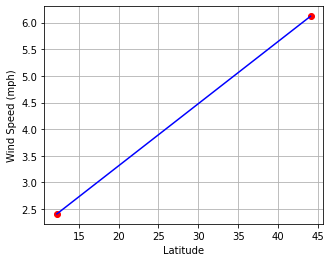

In [22]:
plt.figure(figsize=(5,4))
plt.scatter(N_hemi["Lat"], N_hemi["Wind Speed"], color='r')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("output_data\NLatVsWindSpeed.png")
plt.grid()
# Isolating relevant data columns then calculating regression and coeffecient values
l = N_hemi.iloc[:, 1]
t = N_hemi.iloc[:, 6]
corr_coef = st.pearsonr(l, t)
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(l, t)
vc_fit = vc_slope * l + vc_int
plt.plot(l,vc_fit,"-", color='b')
print(f"The r-value is: {corr_coef[0]}")
plt.show()

Southern Hemisphere - Latitude Vs Wind Speed (mph) Linear Regression

The r-value is: -1.0


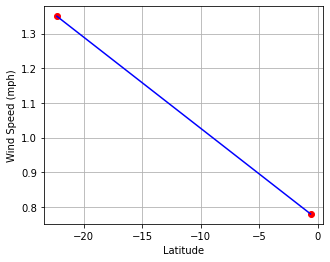

In [23]:
plt.figure(figsize=(5,4))
plt.scatter(S_hemi["Lat"], S_hemi["Wind Speed"], color='r')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("output_data\SLatVsWindSpeed.png")
plt.grid()
# Isolating relevant data columns then calculating regression and coeffecient values
l = S_hemi.iloc[:, 1]
t = S_hemi.iloc[:, 6]
corr_coef = st.pearsonr(l, t)
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(l, t)
vc_fit = vc_slope * l + vc_int
plt.plot(l,vc_fit,"-", color='b')
print(f"The r-value is: {corr_coef[0]}")
plt.show()